In [521]:
from IPython.display import display, HTML

display(HTML('''
    <h1 style="text-align: center; color: #2E86C1; font-family: 'Trebuchet MS', sans-serif;">
        Spam Mail Classification
    </h1>
    <h5 style="text-align: center; color: #2874A6; font-family: 'Georgia', serif;">
        Made By Shad Ali <br> 28/07/2024
    </h5>
'''))


In [523]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score, recall_score, f1_score

In [525]:
df=pd.read_csv("data/spam_ham_dataset.csv")

In [527]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [529]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [531]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [533]:
df.shape

(5171, 4)

In [535]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [537]:
df.head(10)
df.sample(10)

,Unnamed: 0,label,text,label_num
4093,1479,ham,"Subject: spot or firm tickets\r\ndaren ,\r\nfy...",0
1872,3080,ham,Subject: retroactive adjustments\r\nthe follow...,0
1922,1659,ham,Subject: re : duke energy\r\nduke will be paid...,0
4975,182,ham,Subject: ces desk move\r\nassuming the test re...,0
2357,367,ham,Subject: revised copanop # for lst\r\n- - - - ...,0
1648,1398,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
4456,1442,ham,Subject: re : feedback monitor error - meter 9...,0
3702,1910,ham,Subject: fw : n . padre 883 gas allocation\r\n...,0
955,2440,ham,Subject: february wellhead production estimate...,0
4272,2528,ham,Subject: eastrans nominations change effective...,0


In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


Exploratory Data Analysis (EDA)

We can understand data deeper in Exploratory Data Analysis (EDA). In this step, we will do exploratory data analysis.

In [542]:
label_counts = df['label'].value_counts()

label_counts

label
ham     3672
spam    1499
Name: count, dtype: int64

In [544]:
spam_count = label_counts.get('spam', 0)
len_df=len(df)
non_spam_count=len_df-spam_count

In [546]:
print('Spam',spam_count)
print('length of data',len_df)
print('Non-Spam',non_spam_count)

Spam 1499
length of data 5171
Non-Spam 3672


Now We determine the Spam Mails


Text(0, 0.5, 'Nuumer of mails')

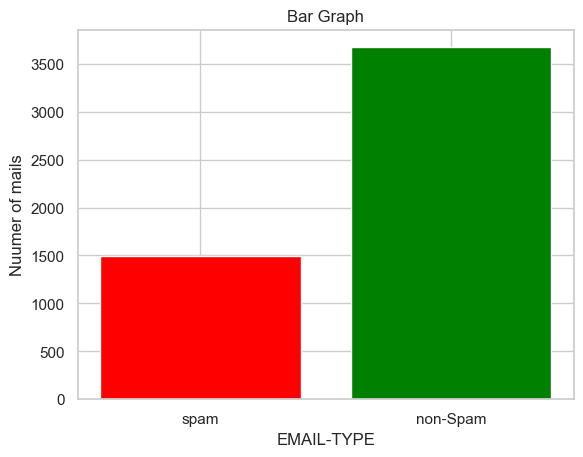

In [549]:
color=['Red','Green']
categories=['spam','non-Spam']
values=[spam_count,non_spam_count]
plt.bar(categories,values,color=color)
plt.title("Bar Graph")
plt.xlabel("EMAIL-TYPE")
plt.ylabel("Nuumer of mails")

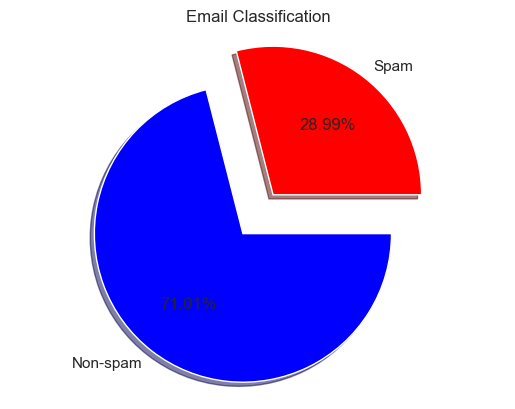

In [551]:
import matplotlib.pyplot as plt
spam_percent = (spam_count / len_df) * 100
non_spam_percent = (non_spam_count / len_df) * 100
labels = 'Spam', 'Non-spam'
sizes = [spam_percent, non_spam_percent]
colors = ['red', 'blue']
explode = (0.1, 0.231)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%0.2f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Email Classification')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_18988\1186831680.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(col)
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


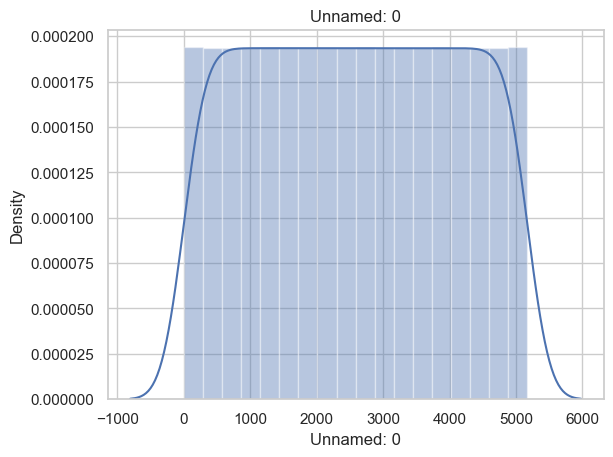

C:\Users\asus\AppData\Local\Temp\ipykernel_18988\1186831680.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(col)
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


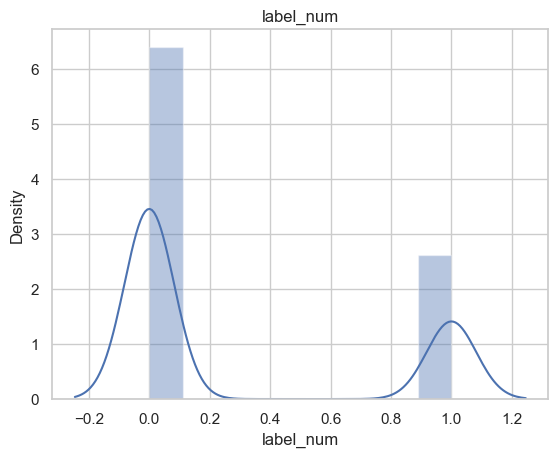

In [553]:
for col in df.columns[:10]:
    if df[col].dtype != 'object':
        sns.distplot(df[col]).set_title(col)
        plt.show()

In [554]:
df.iloc[ : ,1:]

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [555]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['text'])
y = df['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [558]:
print(x_train.shape)
print(x_test.shape)
print(len(y_train))
print(len(y_test))

(3619, 50447)
(1552, 50447)
3619
1552


In [559]:
x_train

<3619x50447 sparse matrix of type '<class 'numpy.float64'>'
	with 321120 stored elements in Compressed Sparse Row format>

In [560]:
y_train

1023     ham
4586    spam
2955     ham
2495     ham
3353     ham
        ... 
4426     ham
466      ham
3092    spam
3772     ham
860      ham
Name: label, Length: 3619, dtype: object

Convert Sparse Matrix to Dense Array:

In [566]:
# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

# Train a Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

# Train a Decision Tree model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)


DecisionTreeClassifier()

In [567]:
# Make predictions on the test set
lr_pred = lr_model.predict(x_test)
nb_pred = nb_classifier.predict(x_test)
dt_pred = dt_classifier.predict(x_test)

# Evaluate Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, pos_label='spam')
lr_recall = recall_score(y_test, lr_pred, pos_label='spam')
lr_f1 = f1_score(y_test, lr_pred, pos_label='spam')

print("Logistic Regression Model")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1 Score: {lr_f1:.2f}")

# Evaluate Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, pos_label='spam')
nb_recall = recall_score(y_test, nb_pred, pos_label='spam')
nb_f1 = f1_score(y_test, nb_pred, pos_label='spam')

print("\nNaive Bayes Model")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1 Score: {nb_f1:.2f}")

# Evaluate Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, pos_label='spam')
dt_recall = recall_score(y_test, dt_pred, pos_label='spam')
dt_f1 = f1_score(y_test, dt_pred, pos_label='spam')

print("\nDecision Tree Model")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1 Score: {dt_f1:.2f}")


Logistic Regression Model
Accuracy: 0.98
Precision: 0.96
Recall: 0.97
F1 Score: 0.97

Naive Bayes Model
Accuracy: 0.87
Precision: 1.00
Recall: 0.52
F1 Score: 0.68

Decision Tree Model
Accuracy: 0.93
Precision: 0.87
Recall: 0.90
F1 Score: 0.88


In [570]:
display(HTML('''

    <p style="text-align: center; color: #2C3E50; font-family: 'Arial', sans-serif; margin-top: 50px;">
        Thank you for reviewing this project. <br>
        Your feedback and insights are greatly appreciated. <br>
        If you have any questions or suggestions, feel free to reach out.
    </p>
    <p style="text-align: center; color: #2C3E50; font-family: 'Arial', sans-serif; margin-top: 20px;">
        <strong>Contact:</strong> <br>
        <a href="mailto:shad.ali@example.com" style="color: #2874A6;">alishad846@gmail.com</a>
    </p>
'''))